# CSCI 3022 Classification Project - Heart Disease Prediction
## - Brian Solar

***

## Introduction

For our class, CSCI 3022 - Introduction to Data Science Algorithms, we are tasked with going through a machine-learning pipeline as our final project. We have the choice of selecting a classification and/or regression problem, in which I chose classification. In all, it entails: 

1. Identify a multivariate analysis problem of interest  
2. Selecting data source(s)
3. Preprocess data (cleaning, transforming if necessary, etc.)
4. Perform regression or classification 

The following notebook walks through this process, for the selected problem of heart disease prediction.

***

## Table of Contents

1. [Heart Disease](#heart)
    * [Introduction](#idenintro)
    * [Data Source](#datasource)
    * [Data Description](#datadescr)
    * [Goals](#goals)
3. [Exploratory Data Analysis](#eda) (In Progress)
    * [Quick Look](#quicklook)
    * [Preprocessing](#preprocessing)
    * [Variable Exploration](#varexp)
4. [Classification](#classification)
    * [Preprocessing](#classpreproc)
    * [Building Classifiers](#buildclass)
    * [Feature Importance](#featimport)
    * [Hyperparameter Optimization](#hyper)
    * [Evaluation](#eval)

***

<a id='heart'></a>
## Heart Disease

<a id='idenintro'></a>
### Introduction
It is probably known to most that heart disease is the number 1 killer in the United States, and also the [world](https://www.heart.org/-/media/data-import/downloadables/heart-disease-and-stroke-statistics-2018---at-a-glance-ucm_498848.pdf). There is also an effort to [detect heart disease early](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), so that the necessary lifestyle changes and medical treatments can be made. With the widespread use of machine learning and other statistical tools in the world of [healthcare](https://www.nature.com/articles/s41563-019-0360-1), predicting heart disease with machine learning seems like an obvious task, and in fact, has already been [attempted](https://academic.oup.com/eurheartj/article-abstract/40/24/1975/5060564?redirectedFrom=fulltext). Needless to say, given the complexity of our human body which certaintly leaves heart disease dependent on multiple variables, and how significant early prediction may be, I've chosen this as my multivariate analysis problem to be tackled with classification.

<a id='datasource'></a>
### Data Source

I originally found my dataset on [kaggle](https://www.kaggle.com/johnsmith88/heart-disease-dataset), and discovered it was actually taken from the popular UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This dataset consists of 4 databases (as shown in the UCI link) from the following locations:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Interestingly, prior research has only used the database from Cleveland (in fact, there is a very popular Kaggle challenge which uses the Cleveland dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci), which I have drawn some inspiration from). The dataset I will be using will make use of all 4 databases.

<a id='datadescr'></a>
### Data Description
Each database contains measurements from patients (looks to be patients in a hostpital due to chest pain) after being subjected to [angiography](https://www.mayoclinic.org/tests-procedures/coronary-angiogram/about/pac-20384904), and after what appears to be clinically induced exercise. Although each database has 76 variables, only 14 of them have been used in existing literature. The following are the 14 variables with their descriptions:

1. __age__ : Age in years
2. __sex__: Male (1) or Female (0) 
3. __cp__: Chest pain type (angina is another name for chest pain)
    * 0: Typical Angina
    * 1: Atypical Angina 
    * 2: Non-Anginal Pain
    * 3: Asymptomatic 
4. __trestbps__: Resting blood pressure (mmHg)
5. __chol__: Serum cholesterol (mg/dl)
6. __fbs__: Fasting blood sugar > 120 mg/dl
    * (1) True
    * (0) False
7. __restecg__: Resting electrocardiographic results
    * (0) Normal
    * (1) Having ST-T wave abnormality 
    * (2) Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. __thalach__: Maximum heart rate achieved (bpm)
9. __exang__: Exercise induced angina
    * (1) True
    * (0) False
10. __oldpeak__: ST depression induced by exercise relative to rest (real number)
11. __slope__: Slope of the peak exercise ST segment 
    * (0) Upsloping 
    * (1) Flat 
    * (2) Downsloping 
12. __ca__: Number of major vessels (0-4) colored by flouroscopy
13. __thal__: Thalassemia
    * (0) Unknown
    * (1) Normal
    * (2) Fixed defect
    * (3) Reversable defect
14. __target__: Patient has heart disease
    * (1) True
    * (0) False


<a id='goals'></a>
### Goals

A lot of the variables are (were) unknown to me, and because of this, I will not even begin to hypothesize which factors contribute to heart disease. What I will do is the following:

1. Conduct background research on each variable and possibly how it relates to heart disease.
2. Conduct statistical tests on each variable, to include KDEs and other graphical plots, with the goal of visually comparing how each variable presents itself in patients with and without heart disease.
3. Determine which variables have the highest correlation with heart disease
4. Develop a heart disease classification model that is superior to those in previous kaggle kernels

In pursuit of these goals, some intermediate steps will be needed and presented when appropriate.

***

<a id='eda'></a>
## Exploratory Data Analysis

<a id='quicklook'></a>
### Quick Look at Data

In [525]:
import numpy as np
import pandas as pd 

heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Number of patients and features

In [526]:
print("Number of Patients: {}\nNumber of Variables: {}".format(*heart.shape))

Number of Patients: 1025
Number of Variables: 14


Let's see how many unique values each variable has, and also the datatypes

In [527]:
for column in heart.columns:
    print("%s       \t# of unique values: %s,   \tdtype: %s" % (column, len(np.unique(heart[column].values)), heart[column].dtype))

age       	# of unique values: 41,   	dtype: int64
sex       	# of unique values: 2,   	dtype: int64
cp       	# of unique values: 4,   	dtype: int64
trestbps       	# of unique values: 49,   	dtype: int64
chol       	# of unique values: 152,   	dtype: int64
fbs       	# of unique values: 2,   	dtype: int64
restecg       	# of unique values: 3,   	dtype: int64
thalach       	# of unique values: 91,   	dtype: int64
exang       	# of unique values: 2,   	dtype: int64
oldpeak       	# of unique values: 40,   	dtype: float64
slope       	# of unique values: 3,   	dtype: int64
ca       	# of unique values: 5,   	dtype: int64
thal       	# of unique values: 4,   	dtype: int64
target       	# of unique values: 2,   	dtype: int64


It appears that most of the variables are categorical (have only a few unique values), but as we saw previously, __ca__, or the number of major blood vessels, is actually an ordered sequence (from 0 to 4).

<a id='preprocessing'></a>
### Preprocessing

#### Dummy variables
Because we have categorical variables, we should transform them to dummy variables. This does not apply to those that are boolean (0 or 1), or __ca__ as mentioned above, leaving just __cp__, __restecg__, __slope__, and __thal__.

In [528]:
dummyVars = ['cp', 'restecg', 'slope', 'thal']  # We found that these variables specifically are in need of dummy variables

heart = pd.get_dummies(heart, columns = dummyVars)

heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


#### Rename Variables to something descriptive

Annoyingly, we see that each variable is named according to the fortran convention. Let's change them to overly verbose names.

In [529]:
# Checkout https://archive.ics.uci.edu/ml/datasets/heart+Disease for a description of each variable

renameColumns = {'trestbps': 'Resting Blood Pressure (mmHg)',
                 'chol': 'Serum Cholestoral (mg/dl)',
                 'fbs': 'Fasting Blood Sugar > 120 mg/dl',
                 'thalach': 'Maximum Heartrate Achieved',
                 'exang': 'Exercise Induced Angina',
                 'oldpeak': 'ST Depression',
                 'ca': 'Number of Major Blood Vessels',
                 'target': 'Heart Disease Present',
                 'cp_0': 'Chest Pain Typical Angina',
                 'cp_1': 'Chest Pain Atypical Angina',
                 'cp_2': 'Chest Pain Non-Anginal Pain',
                 'cp_3': 'Chest Pain Asymptomatic',
                 'restecg_0': 'Rest ECG normal',
                 'restecg_1': 'Rest ECG ST-T Wave Abnormality',
                 'restecg_2': 'Rest ECG Left Ventricular Hypertrophy',
                 'slope_0': 'Slope Upsloping',
                 'slope_1': 'Slope Flat',
                 'slope_2': 'Slope Downsloping',
                 'thal_0': 'Thalasemmia NaN',  # 0 is not a valid category
                 'thal_1': 'Thalasemmia Normal',
                 'thal_2': 'Thalasemmia Fixed Defect',
                 'thal_3': 'Thalasemmia Reversable Defect'}

heart.rename(mapper = renameColumns, axis = 1, inplace=True)
heart.head()

,age,sex,Resting Blood Pressure (mmHg),Serum Cholestoral (mg/dl),Fasting Blood Sugar > 120 mg/dl,Maximum Heartrate Achieved,Exercise Induced Angina,ST Depression,Number of Major Blood Vessels,Heart Disease Present,...,Rest ECG normal,Rest ECG ST-T Wave Abnormality,Rest ECG Left Ventricular Hypertrophy,Slope Upsloping,Slope Flat,Slope Downsloping,Thalasemmia NaN,Thalasemmia Normal,Thalasemmia Fixed Defect,Thalasemmia Reversable Defect
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


#### Remove Thalessemia NaN

For some reason, maybe due to there not existing a Thalasemmia measurement for some patients, they were given an unknown value (0 in this case). Let's remove those patients from the dataset which don't have a valid Thalasemmia measurement.

In [530]:
nOldPatients = heart.shape[0]
nNanPatients = heart['Thalasemmia NaN'].sum()

print("Number of patients with invalid Thalasemmia measurement:", nNanPatients)

heart = heart[heart['Thalasemmia NaN'] != 1]
heart.drop(columns = 'Thalasemmia NaN', inplace = True)

print("Removed patients with invalid Thalasemmia measurement:", 'Thalasemmia NaN' not in heart.columns and (heart.shape[0] == nOldPatients - nNanPatients))
print("Number of patients now:", heart.shape[0])

Number of patients with invalid Thalasemmia measurement: 7
Removed patients with invalid Thalasemmia measurement: True
Number of patients now: 1018


<a id='varexp'></a>
### Variable Exploration

The goal of variable exploration is twofold, 1) do some background investigation for each variable by researching online, and 2) see how each variable compares to each other, in the context of heart disease. 


#### Initial Cross-Correlation Map

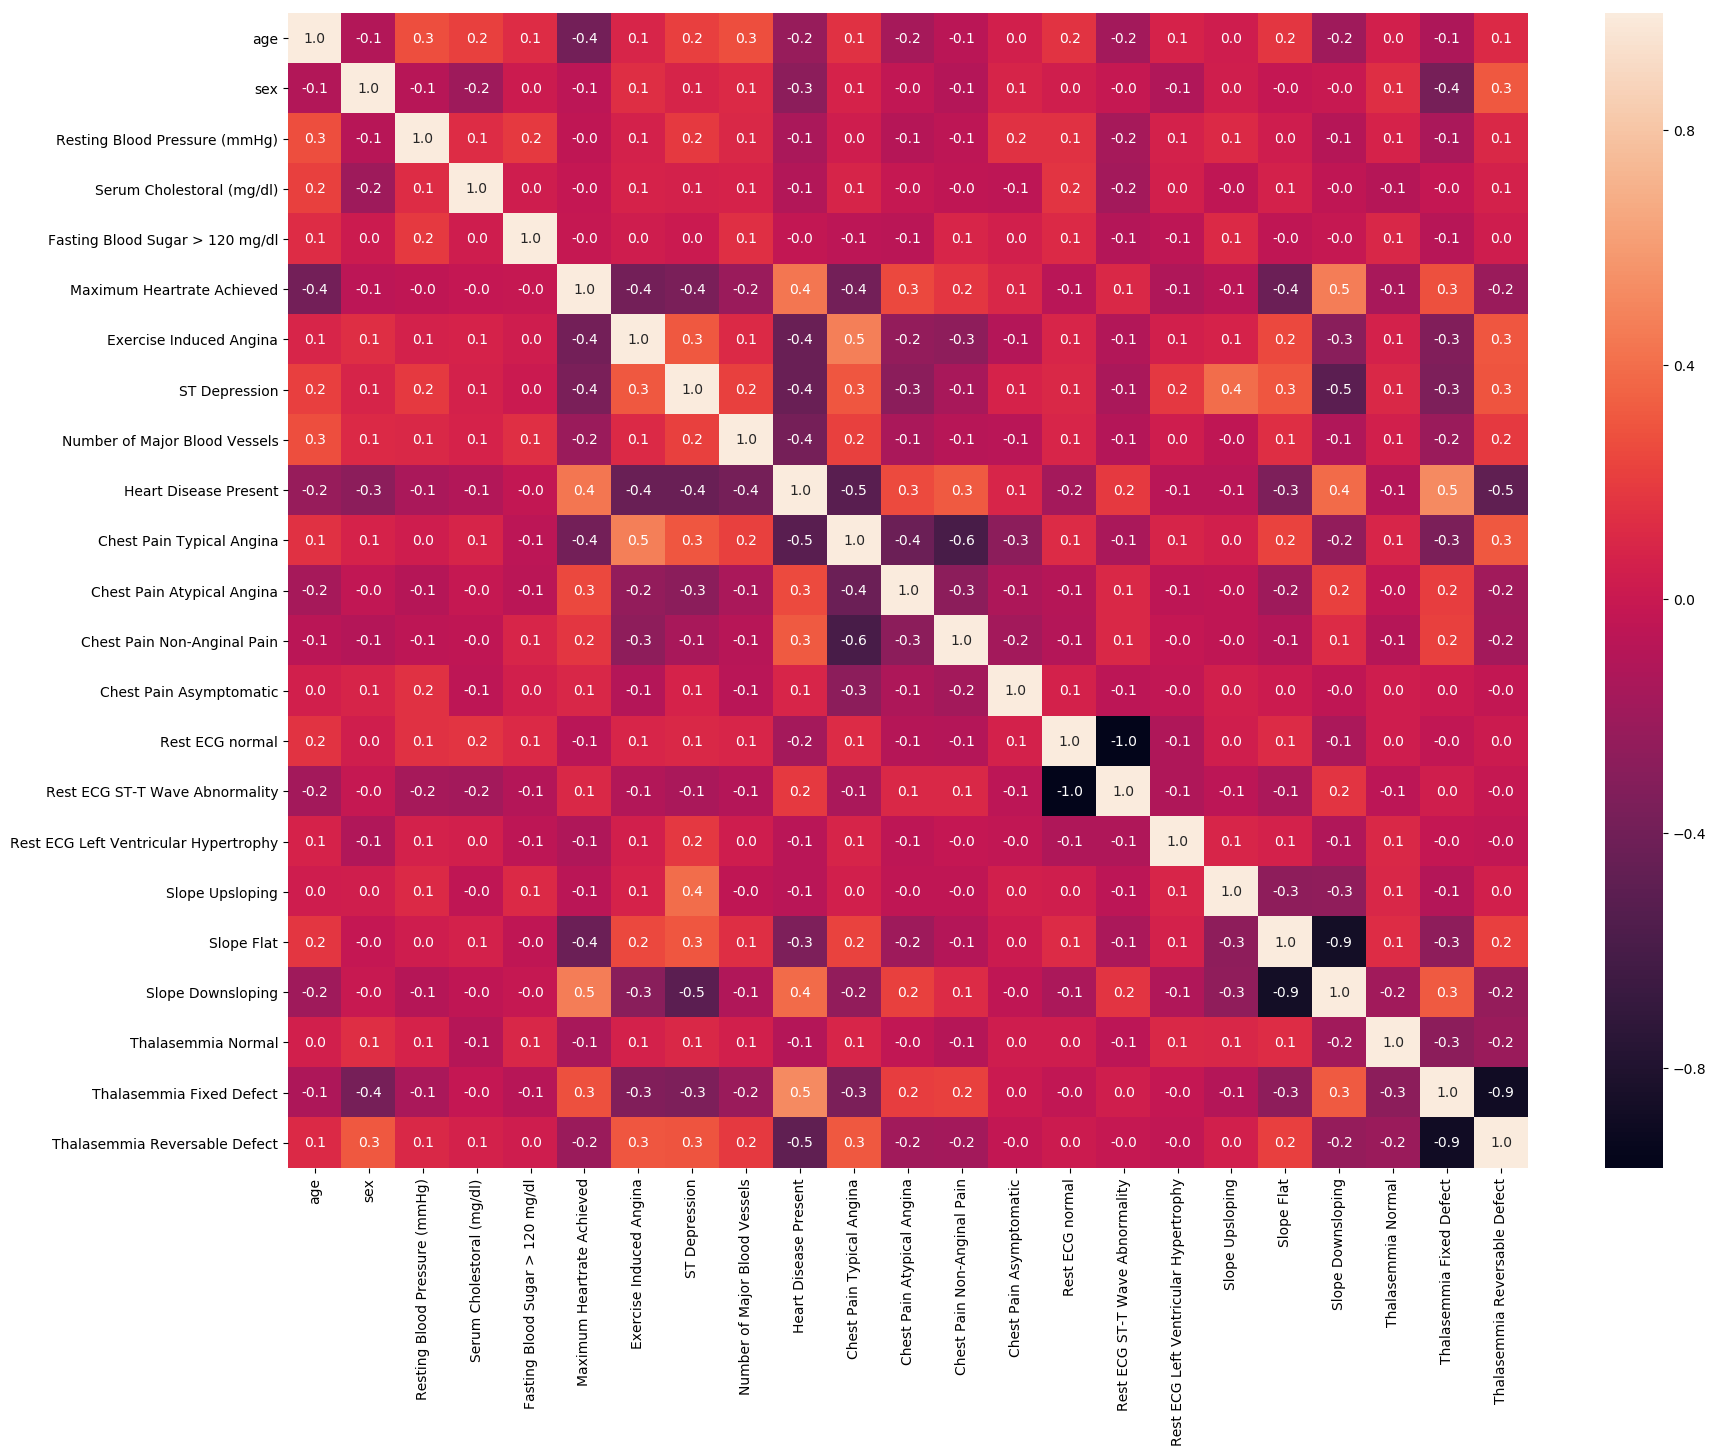

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))
sns.heatmap(heart.corr(), annot = True, fmt = '.1f')
plt.show()

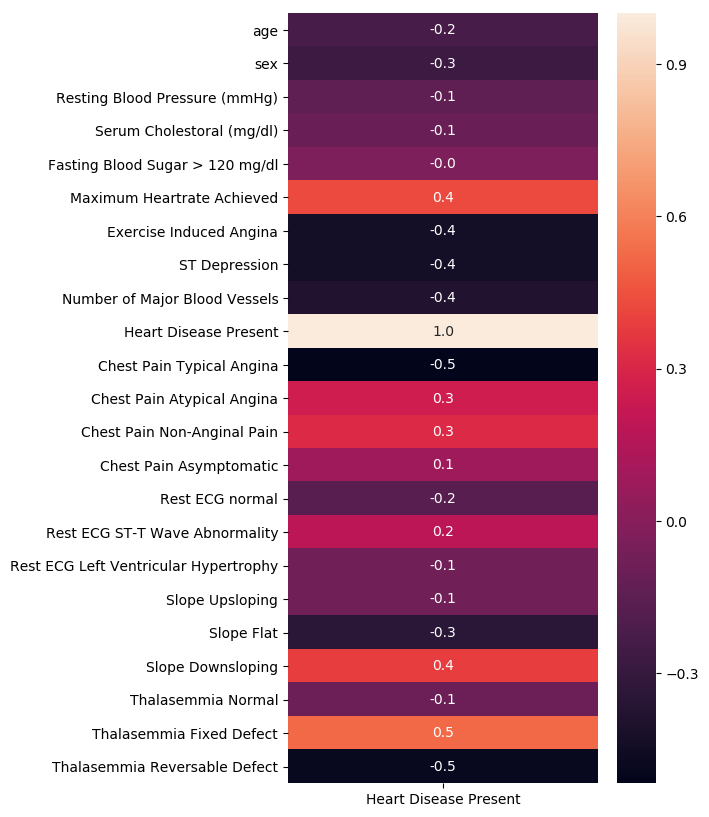

In [532]:
plt.figure(figsize = (5, 10))
sns.heatmap(heart.corr()['Heart Disease Present'].to_frame(), annot = True, fmt = '.1f')
plt.show()

#### Pairplot for continuous variables, which may not be that useful

/Users/apollo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/apollo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


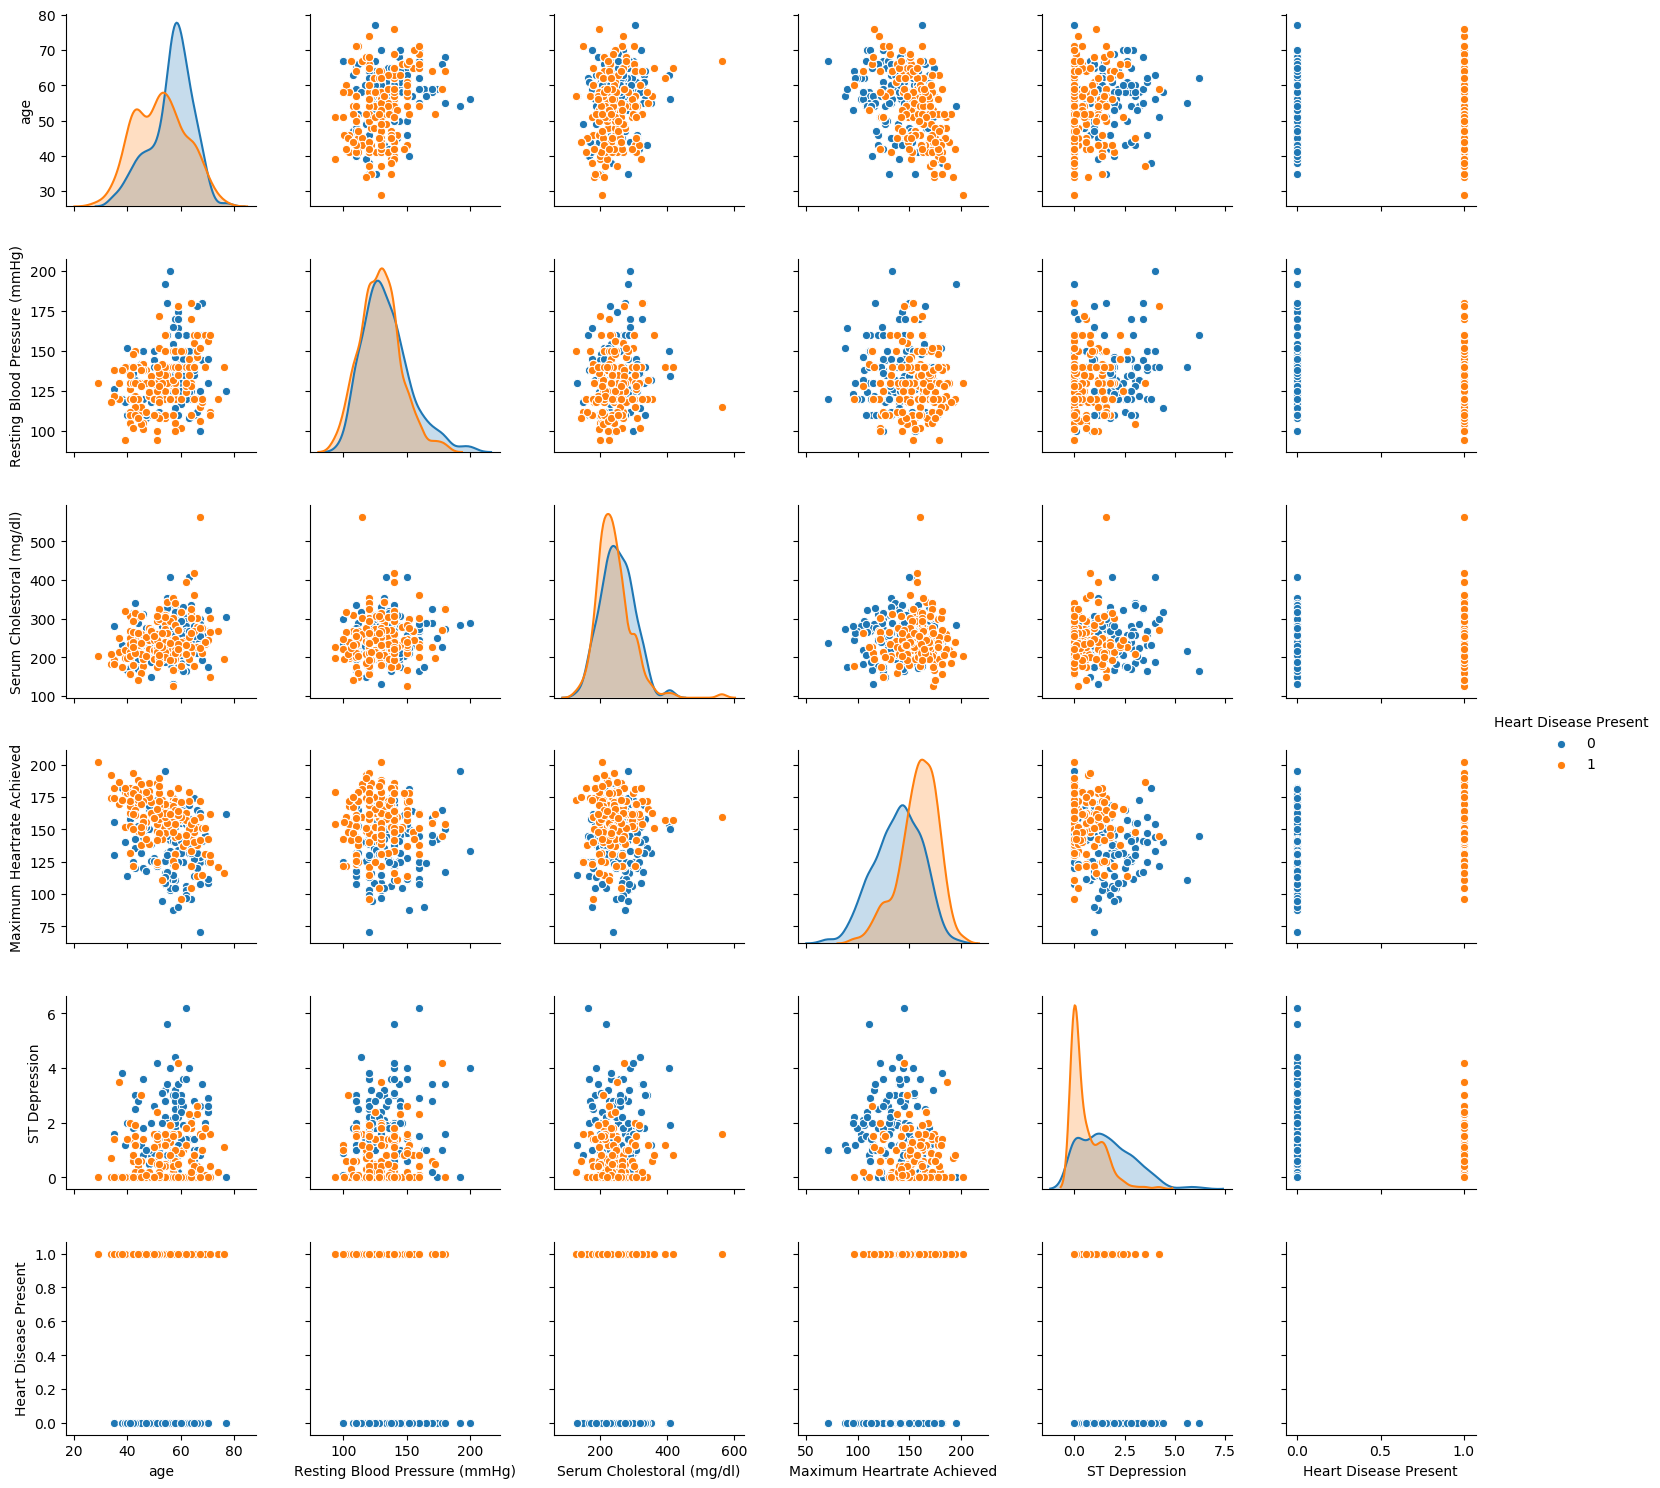

In [533]:
continuousVariables = ['age', 'Resting Blood Pressure (mmHg)', 'Serum Cholestoral (mg/dl)', 
                       'Maximum Heartrate Achieved', 'ST Depression', 'Heart Disease Present']

sns.pairplot(heart[continuousVariables], hue = 'Heart Disease Present');

#### Age and Sex

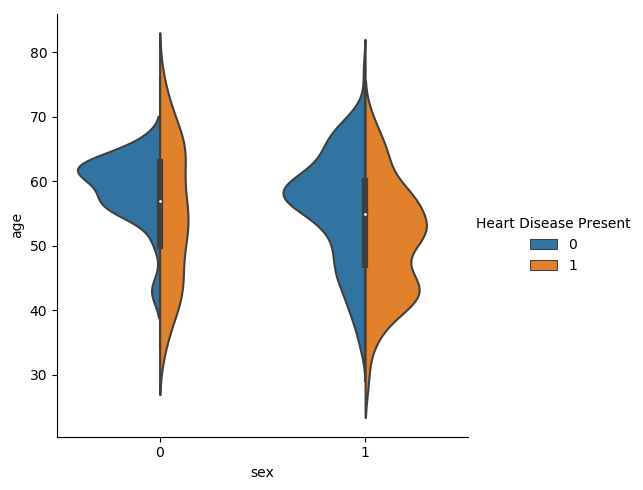

In [470]:
sns.catplot(x = 'sex', y = 'age', hue = 'Heart Disease Present', data = heart, kind = 'violin', split = True);

We see that the distribution of patients that have heart disease is much flatter. Let's look at this further.

#### Just Sex

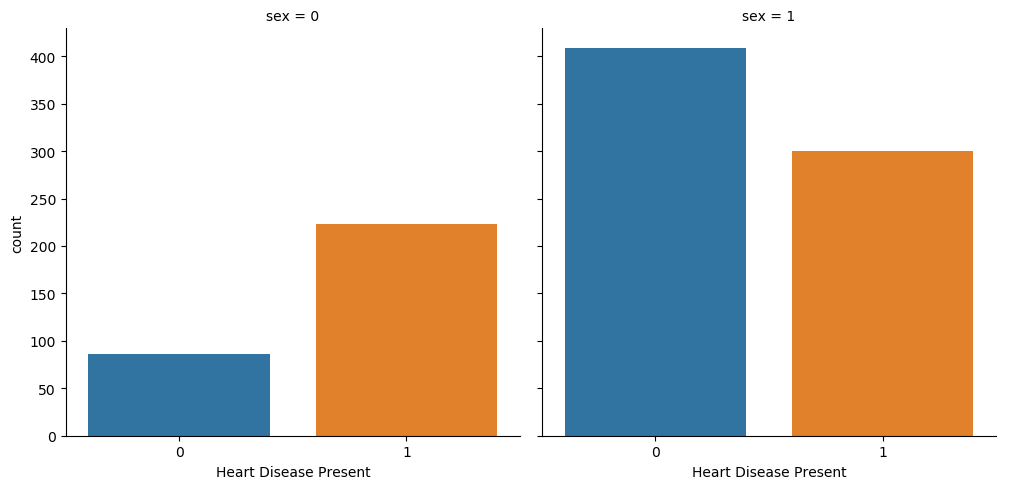

In [471]:
sns.catplot('Heart Disease Present', col = 'sex', kind = 'count', data = heart);

It appears that females are more likely to have heart disease! However, this could be due to other factors, as it appears that they are probably less likely to have heart disease, and in fact, men are more likely to die by heart disease ([source](https://www.kff.org/other/state-indicator/heart-disease-death-rate-by-gender/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)).

How many males, how many females?

In [15]:
nMales = np.sum(heart['sex'] == 1)
nFemales = len(heart) - nMales

print("Number of males: ", nMales)
print("Number of females: ", nFemales)

Number of males:  709
Number of females:  309


There are less than half as many females in this study, which may play a part in this finding.

#### Just Age

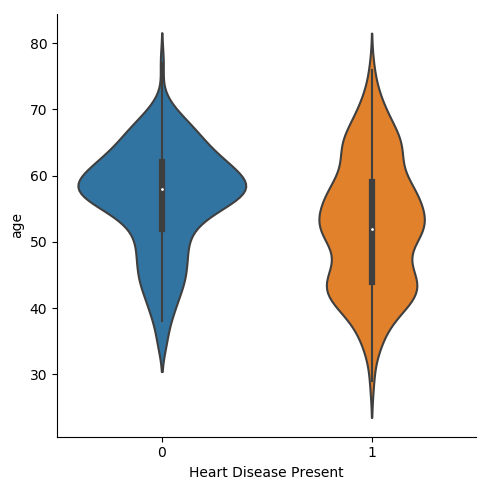

In [472]:
sns.catplot(x = 'Heart Disease Present', y = 'age', kind = 'violin', data = heart)

The results of violin plot seems to indicate that younger people are more likely to have heart disease. This does not agree with larger datasets ([source](https://www.heart.org/idc/groups/heart-public/@wcm/@sop/@smd/documents/downloadable/ucm_449846.pdf), and I would suggest that there are other factors at play here. 

#### Resting Blood Pressure

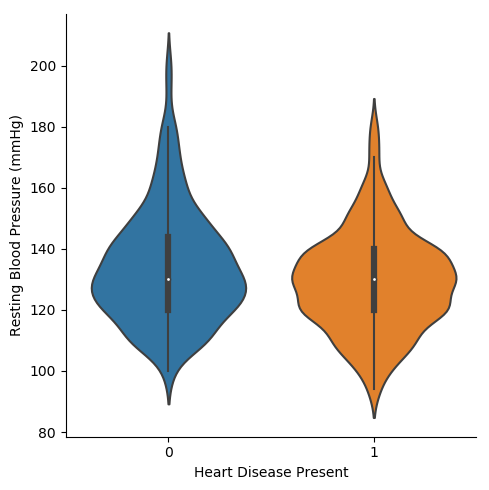

In [473]:
sns.catplot(x = 'Heart Disease Present', y = 'Resting Blood Pressure (mmHg)', kind = 'violin', data = heart)

Blood pressure does not seem to correlate with heart disease here

#### Cholesterol

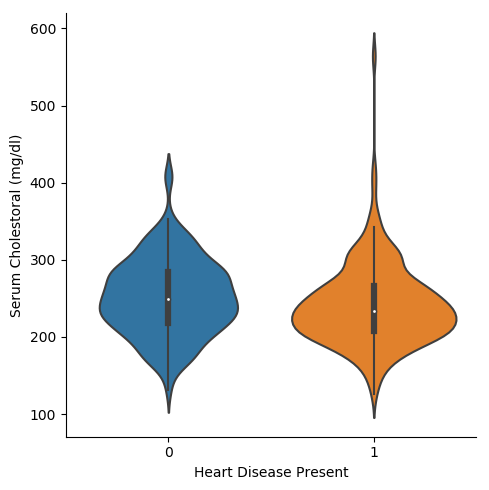

In [474]:
sns.catplot(x = 'Heart Disease Present', y = 'Serum Cholestoral (mg/dl)', kind = 'violin', data = heart)

Cholesterol levels does not seem to correlate with heart disease here

#### Fasting Blood Sugar

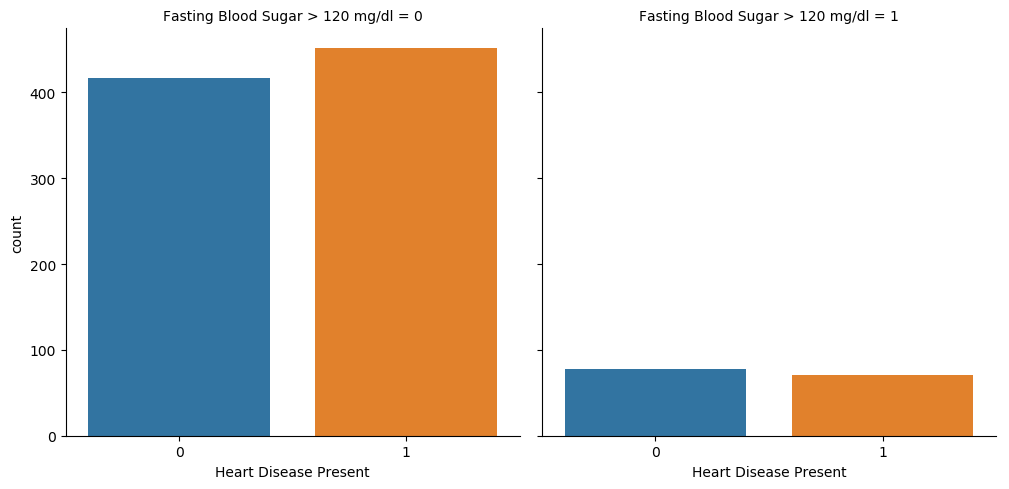

In [475]:
sns.catplot('Heart Disease Present', col = 'Fasting Blood Sugar > 120 mg/dl', data = heart, kind = 'count')

Blood sugar does not seem to correlate with heart disease here

#### Maximum Heart Rate Achieved

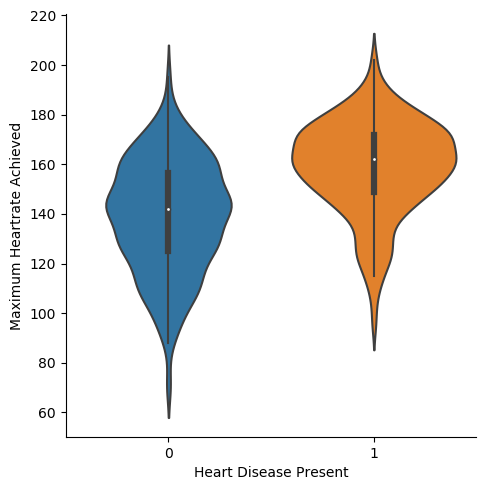

In [476]:
sns.catplot(x = 'Heart Disease Present', y = 'Maximum Heartrate Achieved', kind = 'violin', data = heart)

It appears those that reached their maximum heart rate during exercise were more likely to have heart disease. 

#### Exercise Induced Angina

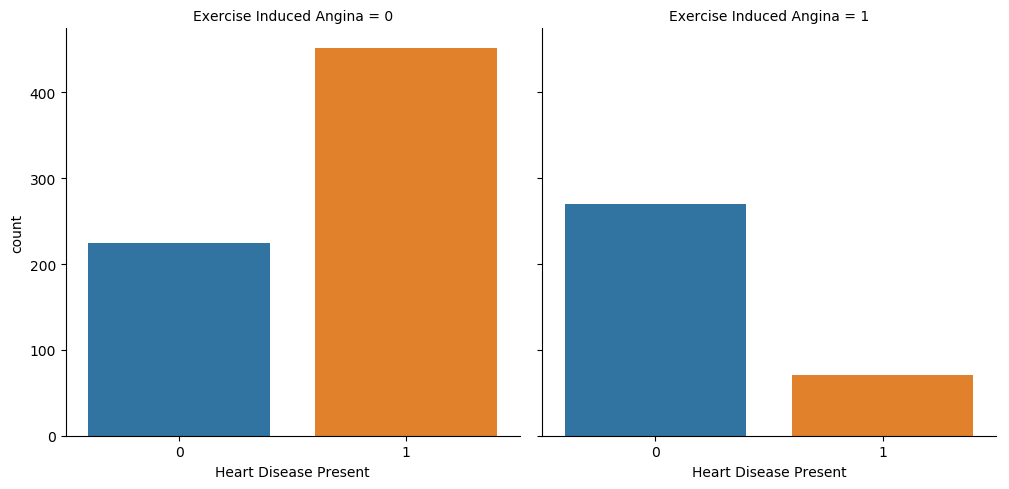

In [477]:
sns.catplot('Heart Disease Present', col = 'Exercise Induced Angina', kind = 'count', data = heart)

It seems those that experienced chest pain as a result of exercise were less likely to have heart disease. This seems counterintuitive to me.

#### ST Depression

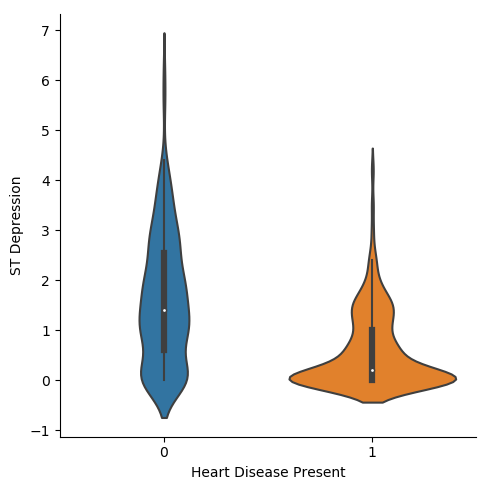

In [478]:
sns.catplot(x = 'Heart Disease Present', y = 'ST Depression', kind = 'violin', data = heart)

Appears that those with heart disease were likely to not have exercised induced ST depression.

#### Number of Major Blood Vessels

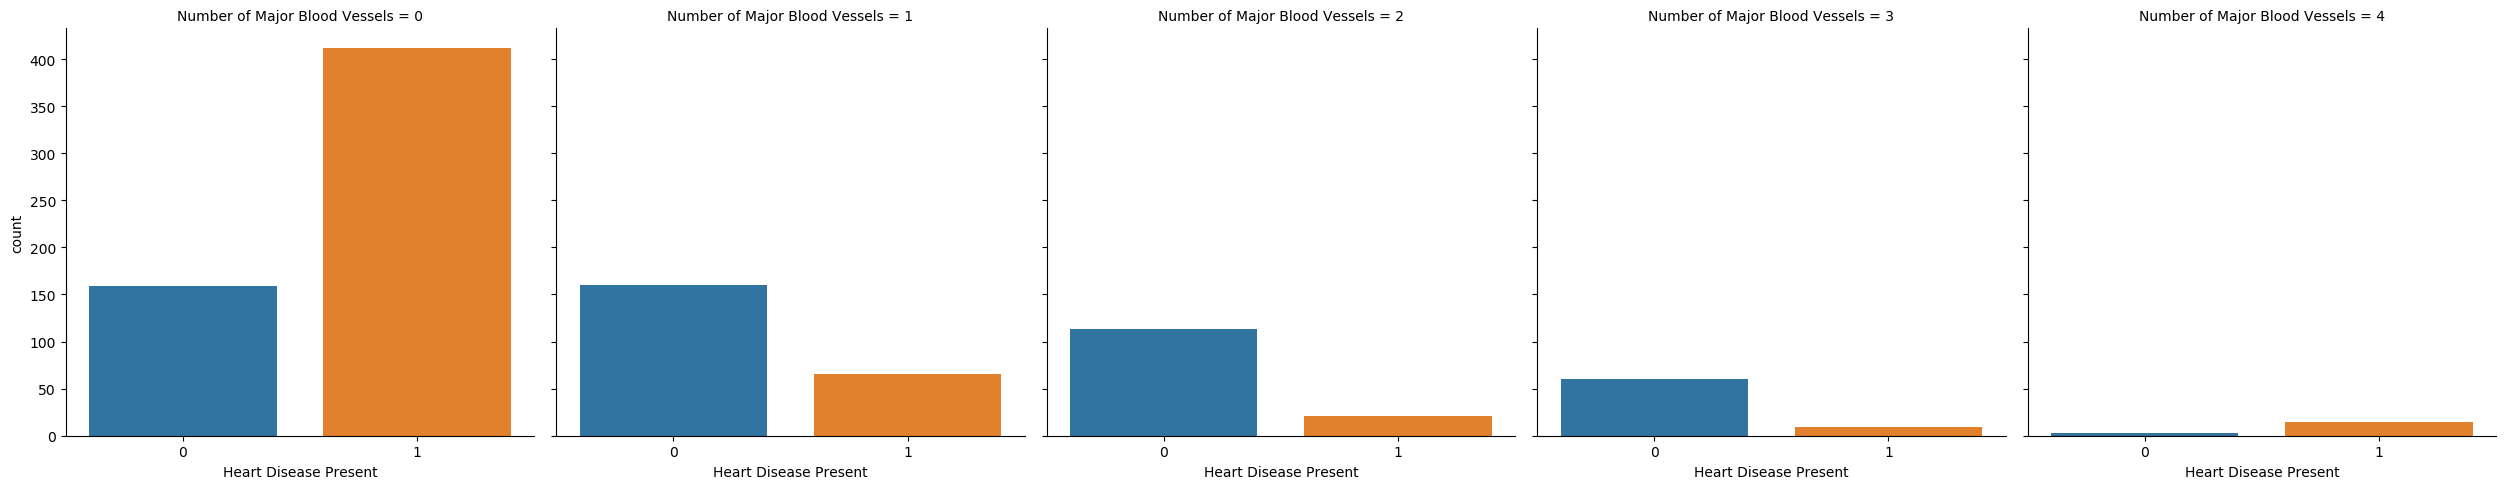

In [479]:
sns.catplot('Heart Disease Present', col = 'Number of Major Blood Vessels', data = heart, kind = 'count')

The less major blood vessels available, the higher chance the person has heart disease.

#### Chest Pain

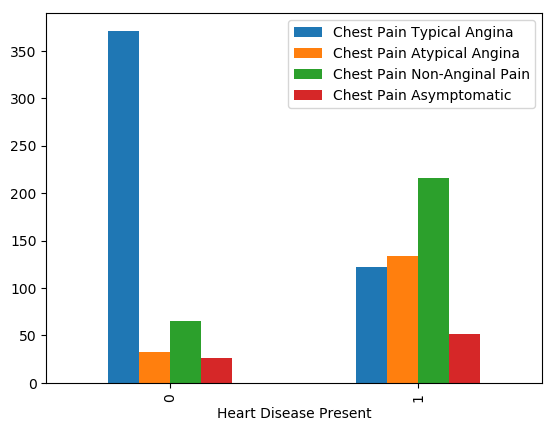

In [480]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Chest Pain' in column]].plot.bar()

Those with typical chest pain were less likely to have heart disease, with the other types of chest pain likely occuring with those with heart disease.

#### Resting Electrocardiogram

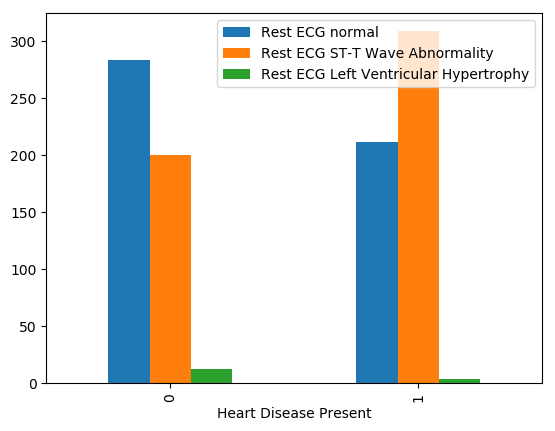

In [481]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'ECG' in column]].plot.bar()

Normal ECG slightly more prevalent in those with no heart disease, and ST-T wave abnormality more prevalent in those with heart disease.

##### Just Left Ventricular Hypertrophy

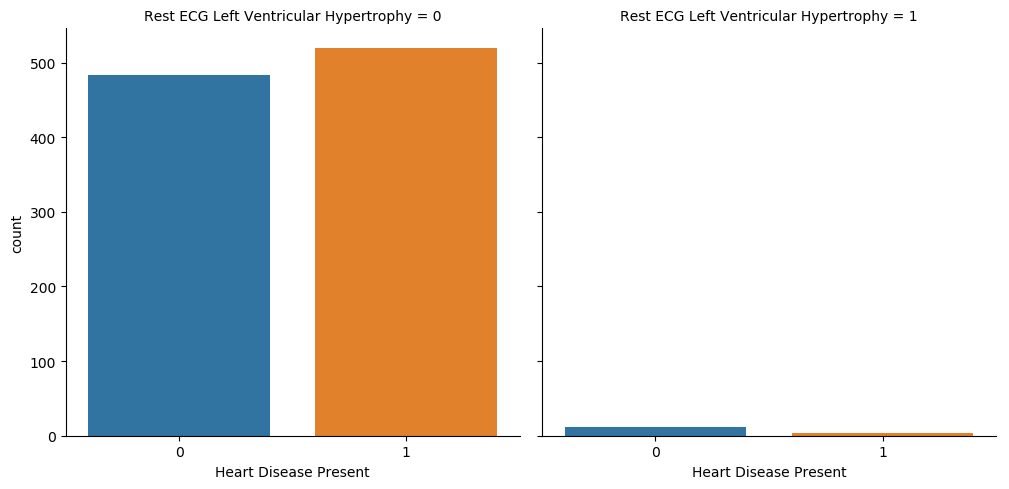

In [482]:
sns.catplot('Heart Disease Present', col = 'Rest ECG Left Ventricular Hypertrophy', kind = 'count', data = heart)

Doest not seem that left ventricular hypertrophy plays a part in heart disease.

#### Slope

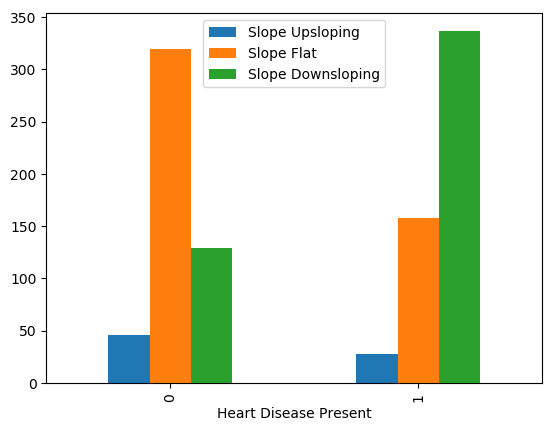

In [483]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Slope' in column]].plot.bar()

Downsloping seems to be correlated to heart disease, and a flat slope seems to be correlated to no heart disease.

#### Thalasemmia

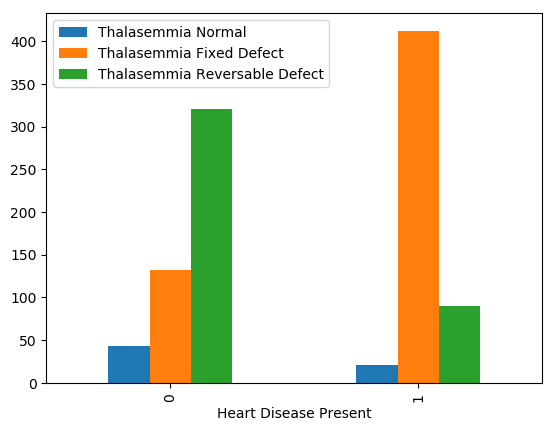

In [484]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Thalasemmia' in column]].plot.bar()

Reversable defect more prevalent in those with no heart disease, and a fixed defect in those with heart disease.

***

<a id='classification'></a>
## Classification

In [524]:
target_column = ['Heart Disease Present']
excluded_columns = ['age', 'sex']

feature_columns = [column for column in heart.columns if column not in target_column and column not in excluded_columns]

x = heart[feature_columns].values
y = heart[target_column].values.ravel()

<a id='classpreproc'></a>
### Preprocessing

#### Split into train and test data

In [488]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = 0.15)

In [490]:
print("Number of training samples:", len(y_train))
print("Number of testing samples:", len(y_test))

Number of training samples: 865
Number of testing samples: 153


#### Perform normalization

Normalization is very useful for kNN.

In [492]:
# https://en.wikipedia.org/wiki/Normalization_(statistics)
class Normalize:
    
    def __init__(self, minimum = 0, maximum = 1):
        self.min = minimum
        self.max = maximum
        
    def fit(self, X):
        self.minX = np.min(X, axis = 0)
        self.maxX = np.max(X, axis = 0)
        
    def transform(self, X):
        return self.min + (X - self.minX) * ((self.max - self.min) / (self.maxX - self.minX))

Because we have bernoulli variables (with values 0 and 1), I will be normalizing the continuous variables to have a max of 1 and a min of 0.

In [494]:
scaler = Normalize()
scaler.fit(x_train)

x_train_scaled, x_test_scaled, x_all_scaled = map(scaler.transform, [x_train, x_test, x])

In [495]:
assert np.min(x_train_scaled) == 0
assert np.max(x_train_scaled) == 1

<a id='buildclass'></a>
### Exercise in Building Classifiers

For this project, I was more interested in how to implement the algorithms than simply using them, so I wrote crude versions of the following classifiers:

* K Nearest Neighbors
* Linear and Quadratic Discriminant Analysis
* Naive Bayes
* Logistic Regression

#### Abstract Classifier

Simple template for the classifier classes

In [497]:
from abc import ABC, abstractmethod

class myClassifier(ABC):
    """
    Based off of sklearn classifiers
    """
    @abstractmethod
    def fit(self, features, targets):
        pass
    
    @abstractmethod
    def predict(self, x):
        pass

#### K Nearest Neighbors

In [498]:
class myKNeighborsClassifier(myClassifier):
    """
    Naive implementation of K Nearest Neighbors.
    
    Based on sklearn.neighbors.KNearestNeighbors.
    """
    def __init__(self, n_neighbors = 5, weights = 'uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        
    def fit(self, features, targets):
        self.features = features
        self.targets = targets
        
    def predict(self, x):
        
        if x.ndim == 1:
            x = x.reshape(1, -1)
        
        if self.weights == 'uniform':
            f = self._uniform
        elif self.weights == 'distance':
            f = self._distance
        else:
            raise ValueError("Weights must be either 'uniform' or 'distance'")
        
        pred_targets = np.zeros(len(x)).astype(int)
        for i, x_ in enumerate(x):
            pred_targets[i] = self._predict(x_, f)
            
        return pred_targets
    
    def _predict(self, x, f):
        
        distances = np.linalg.norm(self.features - x, axis = 1)
        
        kNearestInd = np.argsort(distances)[:self.n_neighbors]
        
        return f(kNearestInd, distances)
        
    def _uniform(self, kNearestInd, distances):
        return self._mode(self.targets[kNearestInd])
    
    def _mode(self, y):
        uniqueValues, uniqueCounts = np.unique(y, return_counts = True)

        return uniqueValues[np.argmax(uniqueCounts)]
    
    def _distance(self, kNearestInd, distances):
        
        valMap = {}

        for val, distance in zip(self.targets[kNearestInd], distances[kNearestInd]):
            if val not in valMap:
                valMap[val] = 0
            valMap[val] += (1 / distance if distance != 0 else 1 / 1e-4)
            
        return max(valMap, key = valMap.get)

#### Linear and Quadratic Discriminant Analysis

In [499]:
class myLinearDiscriminantAnalysis(myClassifier):
    """
    Based on Chapter 4.3 of ESL.
    
    Assumes variance of each feature the same.
    
    Uses the covariance matrix instead of performing shrinkage as normal.
    """
    
    def fit(self, features, targets):
        
        # Inverse of feature covariance matrix
        self.invcov = np.linalg.pinv(np.cov(features, rowvar = False))
        
        # Find priors
        unique_values, unique_inverse, unique_counts = np.unique(targets, return_counts=True, return_inverse=True)
        self.cats = unique_values
        
        self.priors = unique_counts / len(targets)
        
        # Find means
        means = np.zeros((len(unique_values), features.shape[1]))
        
        for i, idx in enumerate(unique_inverse):
            means[idx] += features[i]
            
        self.means = means / unique_counts[:, None] # divide along rows
        self.means = self.means.T # (k, n) to (n, k)
            
    def predict(self, x, apply_threshold = True):
        
        if x.ndim == 1:
            x = x.reshape(1, -1)
            
        try:
            constTerm = self.const
        except:
            # Only want the diagonals of the resulting chained dot product
            self.const = -0.5 * np.einsum('nk,nn,nk->k', self.means, self.invcov, self.means) + np.log(self.priors)
            constTerm = self.const
        
        linearDisc = np.einsum('mn,np,pk->mk', x, self.invcov, self.means) + constTerm
        
        if apply_threshold:
            return self.cats[np.argmax(linearDisc, axis = 1)]
        else:
            return linearDisc[:, np.where(self.cats == 1)[0][0]]
    
class myQuadraticDiscriminantAnalysis(myClassifier):
    """
    Based on Chapter 4.3 of ESL.
    
    Does not assume variance of each feature is the same.
    
    Uses the covariance matrix instead of performing shrinkage as normal.
    """
    
    def fit(self, features, targets):
        
        # Find priors
        unique_values, unique_counts = np.unique(targets, return_counts=True)
        self.cats = unique_values
        
        self.priors = unique_counts / len(targets)
        
        covMatrices = []
        means = []
        for cat in self.cats:
            features_k = features[targets == cat]
            
            covMatrices.append(np.cov(features_k, rowvar=False))
            means.append(np.mean(features_k, axis=0))
            
        self.covMatrices = covMatrices
        self.means = means
        
    def predict(self, x, apply_threshold = True):
        
        if x.ndim == 1:
            x = x.reshape(1, -1)
        
        predictions = []
        
        for i, cat in enumerate(self.cats):

            covMatrix = self.covMatrices[i]
            mean = self.means[i]
            prior = self.priors[i]

            quadDisc = self._quadraticDiscFunc(x, covMatrix, mean, prior)

            predictions.append(quadDisc)
        
        if apply_threshold:
            return self.cats[np.argmax(predictions, axis = 0)]
        else:
            return predictions[np.where(self.cats == 1)[0][0]]
                
    @staticmethod
    def _quadraticDiscFunc(x, covMatrix, mean, prior):
        
        diff = x - mean
        det = np.abs(np.linalg.det(covMatrix)) # sometimes the determinant is a negative number very close to 0
        
        return -0.5 * np.log(det) - 0.5 * np.einsum('mn,np,mp->m', diff, np.linalg.pinv(covMatrix), diff) + np.log(prior)       

#### Naive Bayes

In [500]:
class myNaiveBayes(myClassifier):
    """
    Based on Stanford NB lecture video (https://www.youtube.com/watch?v=6FiNGTYAOAA).
    """
    
    def fit(self, features, targets):
        
        # Find priors
        unique_values, unique_counts = np.unique(targets, return_counts=True)
        self.cats = unique_values
        
        self.priors = unique_counts / len(targets)
        
        means = []
        variances = []
        for cat in self.cats:
            features_k = features[targets == cat]
            
            means.append(np.mean(features_k, axis=0))
            variances.append(np.var(features_k, axis=0))
            
        self.variances = variances
        self.means = means
    
    def predict(self, x, apply_threshold = True):
        if x.ndim == 1:
            x = x.reshape(1, -1)
        
        predictions = []
        
        for i, cat in enumerate(self.cats):

            variance = self.variances[i]
            mean = self.means[i]
            prior = self.priors[i]

            preds = self._decisionFunc(x, variance, mean, prior)

            predictions.append(preds)
        
        if apply_threshold:
            return self.cats[np.argmax(predictions, axis = 0)]
        else:
            return predictions[np.where(self.cats == 1)[0][0]]
    
    @staticmethod
    def _decisionFunc(x, variance, mean, prior):
        
        return -0.5 * np.sum(np.power(x - mean, 2) / variance + np.log(variance), axis = 1) + np.log(prior)

#### Logistic Regression

In [501]:
class myLogisticRegression(myClassifier):
    """
    Binary logistic regression.
    
    A gradient descent implementation was found using this source:
        https://ttic.uchicago.edu/~suriya/website-intromlss2018/course_material/Day3b.pdf
        
    The Adam optimizer was used instead of gradient descent (https://arxiv.org/abs/1412.6980).
    """
    
    def __init__(self, threshold = 0.5, learning_rate = 0.001, beta1 = 0.9, beta2 = 0.999, epochs = 3000):
        self.threshold = threshold
        self.lr = learning_rate
        self.b1 = beta1
        self.b2 = beta2
        self.epochs = epochs
        
        self.params = None
    
    def fit(self, features, targets):
        
        if features.ndim == 1:
            features = features.reshape(1, -1)
        
        features = self._prepend_ones(features)    
        params = np.random.randn(features.shape[1])
        
        # Moment and velocity for Adam optimization
        m, v, t = 0, 0, 0
        
        # Adam optimizer
        for i in range(self.epochs):
            t += 1
            gradient = self._gradient(targets, features, params)
            m = self.b1 * m + (1 - self.b1) * gradient
            v = self.b2 * v + (1 - self.b2) * np.power(gradient, 2)
            m_hat = m / (1 - np.power(self.b1, t))
            v_hat = v / (1 - np.power(self.b2, t))
            params -= self.lr * m_hat / (np.sqrt(v_hat) + 1e-8)
            
        self.params = params
            
    def predict(self, x, apply_threshold = True):
        if self.params is None:
            raise NotImplementedError("Must fit the model before trying to predict.")
        
        if x.ndim == 1:
            x = x.reshape(1, -1)
        
        # Prepend column of ones to x for intercept coefficient
        x = self._prepend_ones(x)
        
        if apply_threshold:
            return (self._sigmoid(x, self.params) >= self.threshold).astype(int)
        else:
            return self._sigmoid(x, self.params)
    
    @staticmethod
    def _prepend_ones(x):
        return np.append(np.ones((len(x), 1)), x, axis = 1)
        
    @staticmethod
    def _sigmoid(x, params):
        return 1 / (1 + np.exp(-x.dot(params)))
    
    @classmethod
    def _gradient(cls, y_true, x, params):
        
        y_pred = cls._sigmoid(x, params)
        
        return np.einsum('mn,m->n', x, y_pred - y_true)

### Simple KFold Evaluation Method

In [502]:
from sklearn.model_selection import KFold

def accuracy_score(y_true, y_pred):
    percentAcc = np.sum(y_true == y_pred) / len(y_true) * 100
    
    return round(percentAcc, 3)

def kfold_evaluation(model, x, y, n_splits = 10, random_state = 0):
    
    kf = KFold(n_splits=n_splits, random_state=random_state)
    
    accuracies = []
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #scaler = StandardScaler()
        scaler = Normalize()
        scaler.fit(x_train)

        x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)

        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return np.mean(accuracies)

#### Simple look at how well these trainers perform

In [503]:
models = {'kNN uniform weighted' : myKNeighborsClassifier(n_neighbors=3, weights='uniform'),
          'kNN distance weighted' : myKNeighborsClassifier(n_neighbors=3, weights='distance'),
          'LDA' : myLinearDiscriminantAnalysis(),
          'QDA' : myQuadraticDiscriminantAnalysis(),
          'NB' : myNaiveBayes(),
          'Logistic Regression' : myLogisticRegression()
         }

In [504]:
print("kfold (k = 10) accuracy on entire dataset:\n")
for modelName, model in models.items():
    
    kfold_accuracy = kfold_evaluation(model, x, y)
    
    print("{}: {:.2f}".format(modelName, kfold_accuracy)) 

kfold (k = 10) accuracy on entire dataset:

kNN uniform weighted: 95.97
kNN distance weighted: 99.41
LDA: 79.27
QDA: 81.91
NB: 82.60
Logistic Regression: 83.48


<a id='featimport'></a>
### Feature Importance

* Step Foward
* Random Forest

#### Step Foward Algorithm

In [505]:
from collections import OrderedDict

modelClass = myNaiveBayes

# index, feature name
unused_features = OrderedDict([(i, feature) for i, feature in enumerate(feature_columns)])
used_features = OrderedDict()

accuracies = []

while len(unused_features) > 0:
    
    bestFeature = None
    bestPred = -np.inf
    bestIdx = None
    
    for i, feature in unused_features.items():
        
        # Get column indices
        feature_idx = list(used_features.keys()) + [i]
            
        # Assess model with these features
        model = modelClass()
        accuracy = kfold_evaluation(model, x[:, feature_idx], y)
        
        if accuracy > bestPred:
            bestPred = accuracy
            bestFeature = feature
            bestIdx = i
            
    del unused_features[bestIdx]
    
    used_features[bestIdx] = bestFeature
    accuracies.append(bestPred)

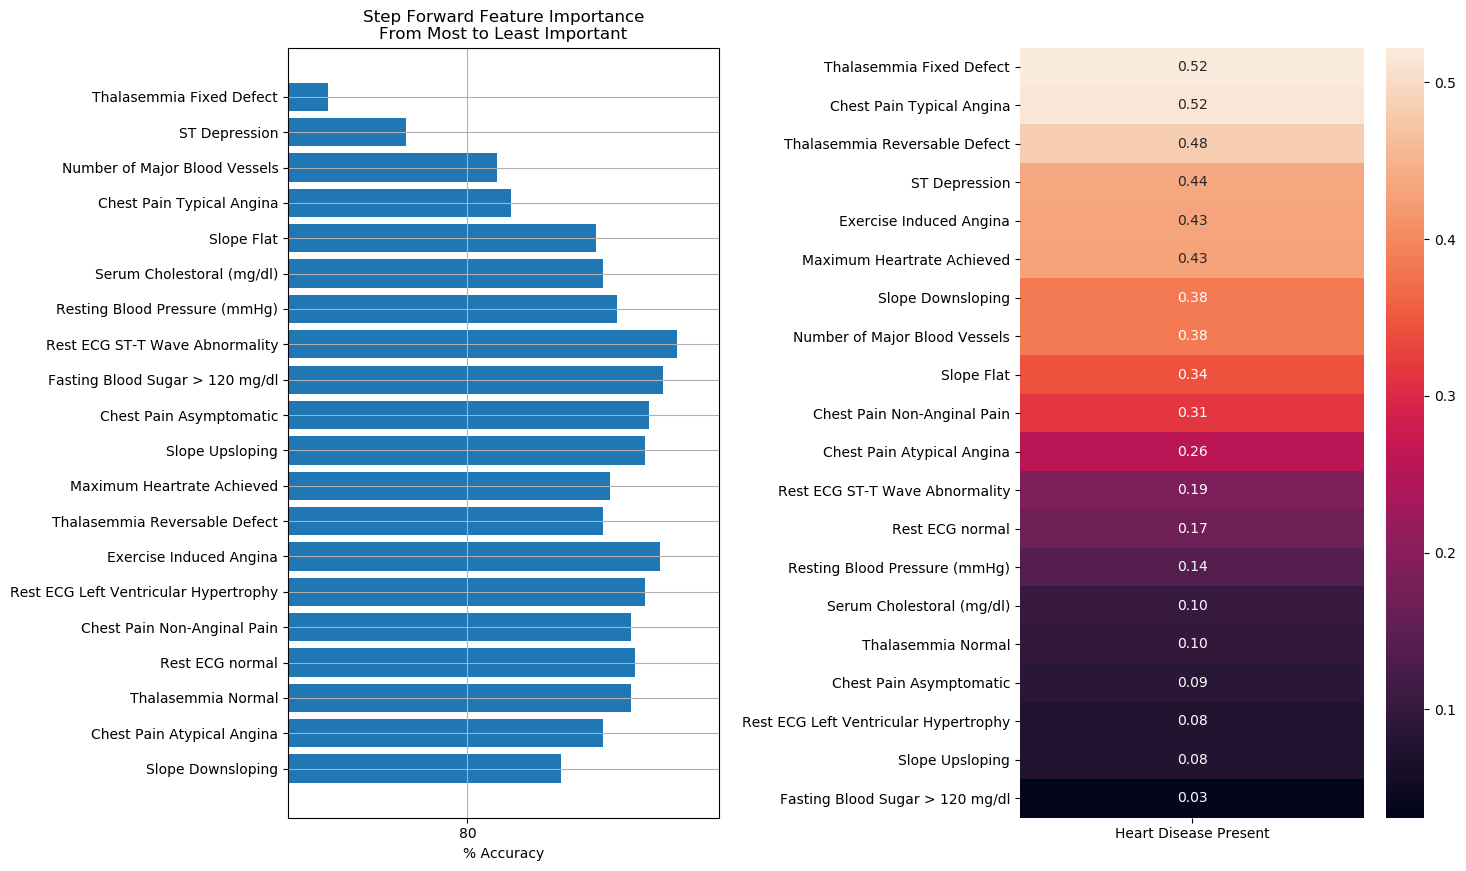

In [515]:
fig, axarr = plt.subplots(1,2, figsize = (15, 10))

fig.subplots_adjust(wspace = .7)

# Example data
features = used_features.values()

y_pos = np.arange(len(features))

ax = axarr[0]

ax.barh(y_pos, accuracies, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% Accuracy')
ax.set_xticks(np.arange(0, 100, 10))
ax.set_title('Step Forward Feature Importance\nFrom Most to Least Important')

ax.set_xlim([75, 87])

ax.grid()

# Highest correlation
highest_correlation = heart.corr()['Heart Disease Present'].to_frame() # Compute correlations with heart disease
highest_correlation = highest_correlation.apply(lambda x: np.abs(x)) # Convert to absolute value
highest_correlation = highest_correlation.drop(['Heart Disease Present', 'sex', 'age']) # Redundant row
highest_correlation = highest_correlation.sort_values('Heart Disease Present', ascending=False) # Descending sort

sns.heatmap(highest_correlation, annot = True, fmt = '.2f', ax = axarr[1]);

plt.show()

#### Random Forest Method

In [507]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

100.0

##### Compare with features highest correlated with heart disease

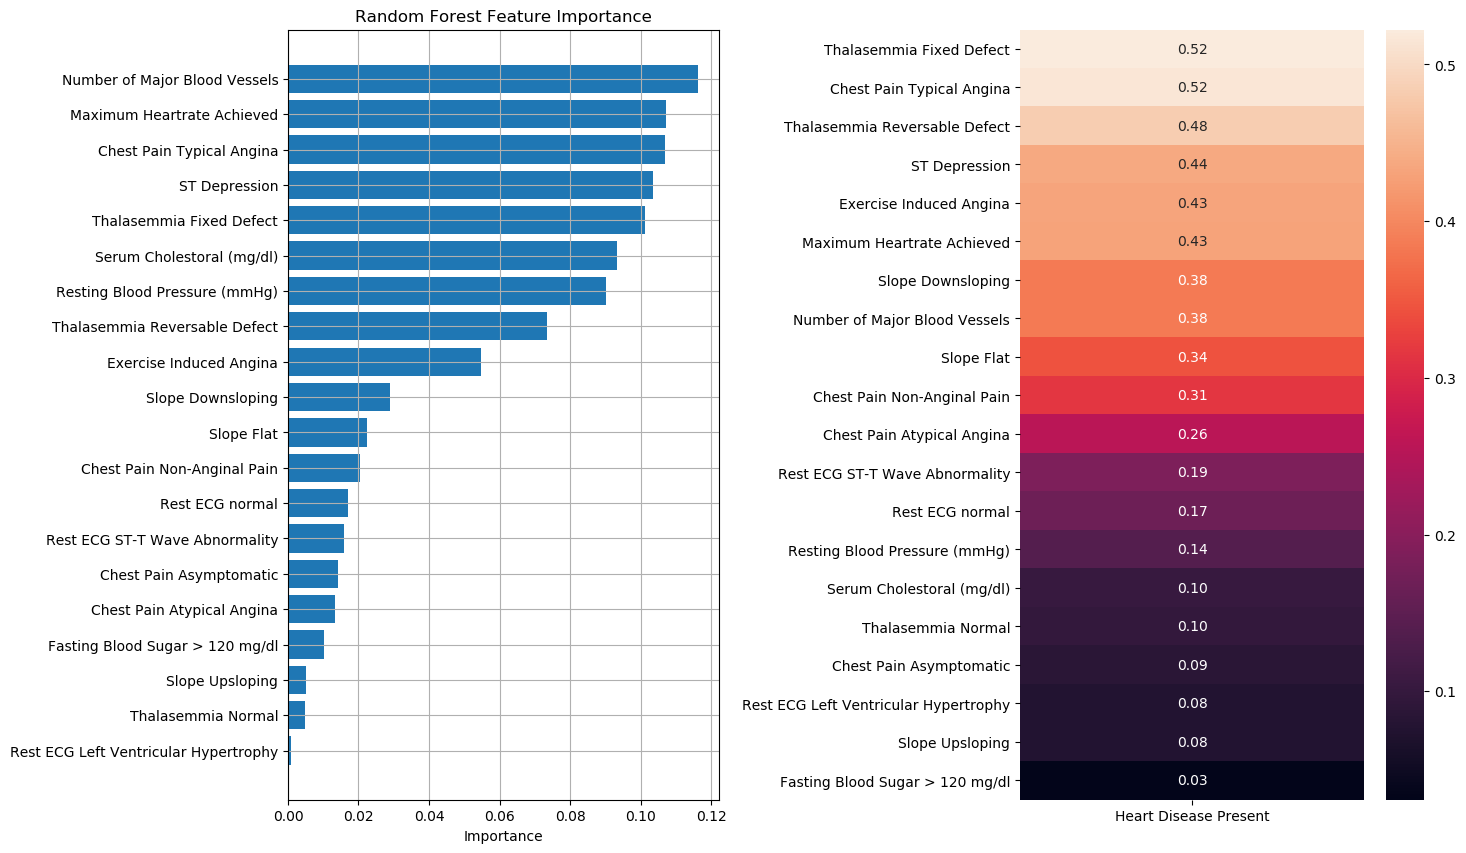

In [513]:
fig, axarr = plt.subplots(1,2, figsize = (15, 10))

fig.subplots_adjust(wspace = .7)

# Example data
features = np.asarray(feature_columns)

y_pos = np.arange(len(features))

# Sorted indices in descending order
sorted_ind = np.argsort(-rf.feature_importances_)

# Random forest feature importances
ax = axarr[0]
ax.barh(y_pos, rf.feature_importances_[sorted_ind], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features[sorted_ind])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Random Forest Feature Importance')
ax.grid()

#plt.figure(figsize = (20, 8))
ax2 = sns.heatmap(highest_correlation, annot = True, fmt = '.2f', ax = axarr[1])
plt.show()

There is some degree of similarity between the two plots. However, we can see that the most important features (when considering a model which uses all features) are not the ones with the greatest correlation with heart disease. This may have something

<a id='hyper'></a>
### Hyperparamter Optimization

Perform hyperparameter optimization on training set

In [517]:
from itertools import product

def grid_search(modelClass, x, y, params, n_splits = 10):
    
    bestParams = None
    bestAcc = -np.inf
    
    params_list = []
    accuracies = []
    
    for gridValues in product(*params.values()):
        params_ = {key: value for key, value in zip(params.keys(), gridValues)}
        
        model = modelClass(**params_)
        
        acc = kfold_evaluation(model, x, y, n_splits=n_splits)
        
        if acc > bestAcc:
            bestAcc = acc
            bestParams = params_
            
        params_list.append(params_)
        accuracies.append(acc)
            
    return bestParams, bestAcc, params_list, accuracies

Of the models presented here, only kNN and Logistic Regression have hyperparameters

#### kNN

##### Hyperparameter optimization on training set

In [518]:
modelClass = myKNeighborsClassifier
params = {'weights': ['uniform', 'distance'], 'n_neighbors': list(range(1, 21))}

bestParams, bestAcc, params_list, accuracies = grid_search(modelClass, x_train_scaled, y_train, params)

print("Optimal hyperparameters:", bestParams)
print("Accuracy on training set:", bestAcc)

Optimal hyperparameters: {'weights': 'distance', 'n_neighbors': 7}
Accuracy on training set: 99.7674


##### Performance of these optimal paramters on the test set

In [519]:
model= modelClass(**bestParams)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Accuracy on test set: 100.0


##### Comparing number of neighbors versus training set accuracy for uniform and distance weighted neighbors

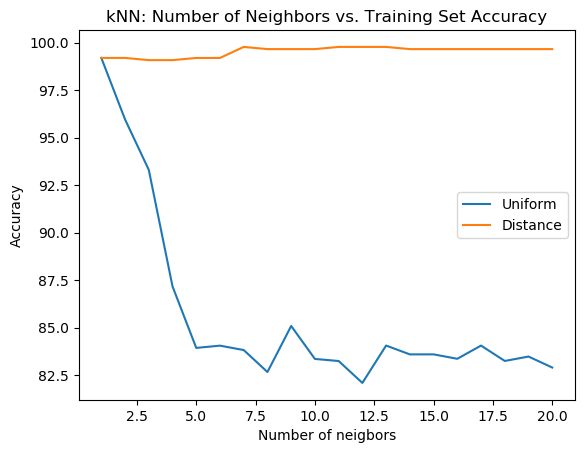

In [520]:
uniform_param = np.array([(param['n_neighbors'], acc) for param, acc in zip(params_list, accuracies) if param['weights'] == 'uniform'])
dist_param = np.array([(param['n_neighbors'], acc) for param, acc in zip(params_list, accuracies) if param['weights'] == 'distance'])

plt.plot(uniform_param[:, 0], uniform_param[:, 1], label = 'Uniform')
plt.plot(dist_param[:, 0], dist_param[:, 1], label = 'Distance')

plt.title("kNN: Number of Neighbors vs. Training Set Accuracy")
plt.xlabel("Number of neigbors")
plt.ylabel("Accuracy")
plt.legend();

When neighbors are weighted by distance, the number of neighbors used has a small affect on the model performance.

#### Logistic Regression

##### Hyperparameter optimization on training set

In [521]:
modelClass = myLogisticRegression
params = {'threshold': np.linspace(0, 1, 11)}

bestParams, bestAcc, params_list, accuracies = grid_search(modelClass, x_train_scaled, y_train, params)

print("Optimal hyperparameters:", bestParams)
print("Accuracy on training set:", bestAcc)

Optimal hyperparameters: {'threshold': 0.5}
Accuracy on training set: 83.9468


##### Performance of these optimal paramters on the test set

In [522]:
model= modelClass(**bestParams)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Accuracy on test set: 86.928


##### Comparing number of neighbors versus training set accuracy for uniform and distance weighted neighbors

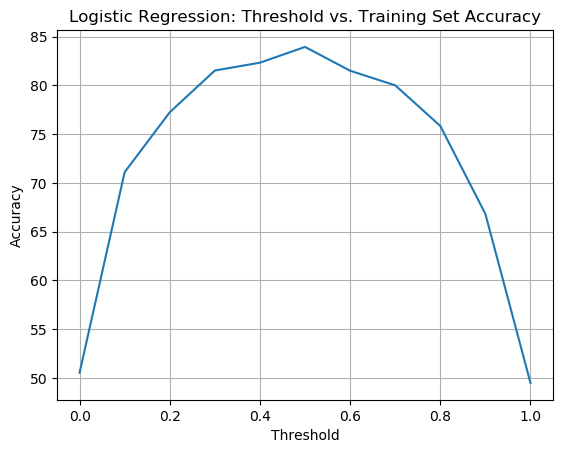

In [523]:
thresholds_param = np.array([(param['threshold'], acc) for param, acc in zip(params_list, accuracies)])

plt.plot(thresholds_param[:, 0], thresholds_param[:, 1]);

plt.title("Logistic Regression: Threshold vs. Training Set Accuracy");
plt.xlabel("Threshold");
plt.ylabel("Accuracy");
plt.grid()

Optimal Logistic Regression threshold is 0.5

<a id='eval'></a>
### Evaluation

* ROC
* Confusion Matrix

#### ROC

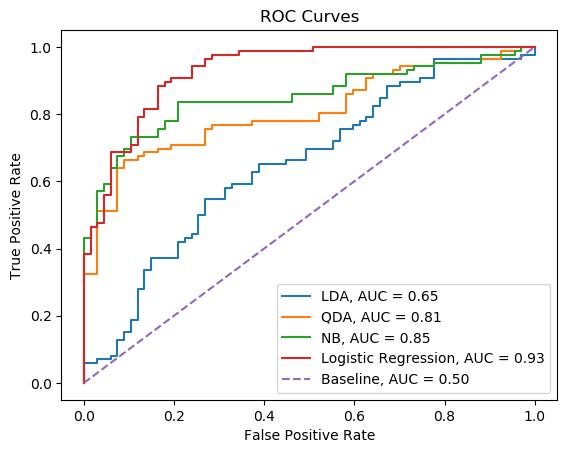

In [351]:
from sklearn.metrics import roc_curve, auc

# Models that have decision function (all except kNN)
models = {'LDA' : myLinearDiscriminantAnalysis(),
          'QDA' : myQuadraticDiscriminantAnalysis(),
          'NB' : myNaiveBayes(),
          'Logistic Regression' : myLogisticRegression()
         }

fig, ax = plt.subplots()

for modelName, model in models.items():
    model.fit(x_train_scaled, y_train)

    scores = model.predict(x_test_scaled, apply_threshold = False)

    fp, tp, _ = roc_curve(y_test, scores)

    ax.plot(fp, tp, label = '{}, AUC = {:.2f}'.format(modelName, auc(fp, tp)))
    
fp, tp = [np.linspace(0, 1, len(y_test)) for _ in range(2)]

ax.plot(fp, tp, '--', label = 'Baseline, AUC = {:.2f}'.format(auc(fp, tp)))
            
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves");
plt.legend();

### Confusion Matrix

In [448]:
from sklearn.metrics import confusion_matrix, classification_report

In [455]:
def plot_confusion_matrix(y_test, y_pred, title):
    
    fig, ax = plt.subplots()
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, ax = ax)
    
    ax.set(title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.show()

kNN
---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



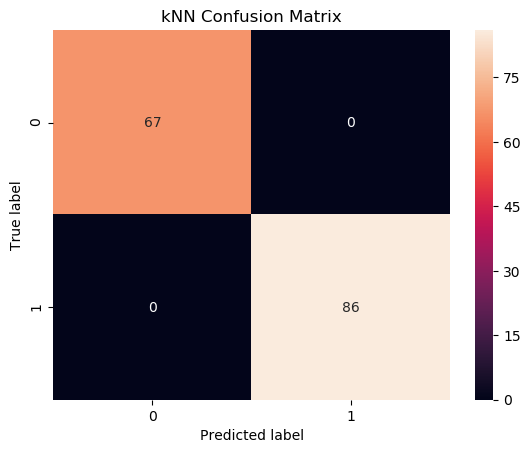

LDA
---
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        67
           1       0.91      0.73      0.81        86

   micro avg       0.81      0.81      0.81       153
   macro avg       0.82      0.82      0.81       153
weighted avg       0.83      0.81      0.81       153



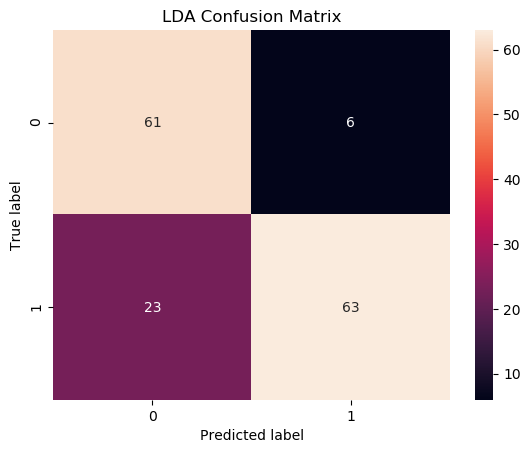

QDA
---
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        67
           1       0.85      0.87      0.86        86

   micro avg       0.84      0.84      0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153



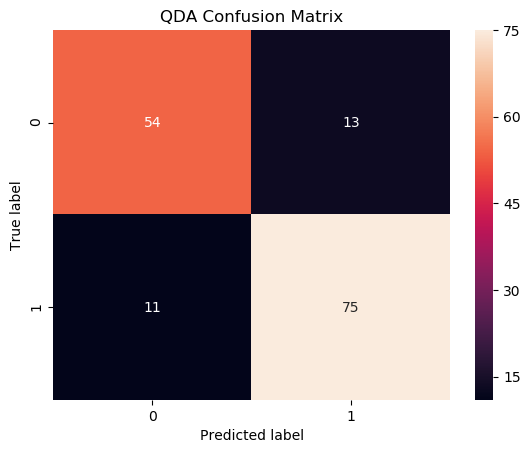

NB
--
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        67
           1       0.86      0.93      0.89        86

   micro avg       0.88      0.88      0.88       153
   macro avg       0.88      0.87      0.87       153
weighted avg       0.88      0.88      0.87       153



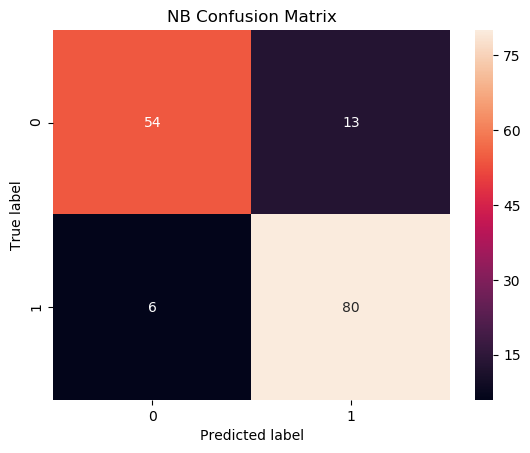

Logistic Regression
-------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        67
           1       0.86      0.88      0.87        86

   micro avg       0.86      0.86      0.86       153
   macro avg       0.85      0.85      0.85       153
weighted avg       0.86      0.86      0.86       153



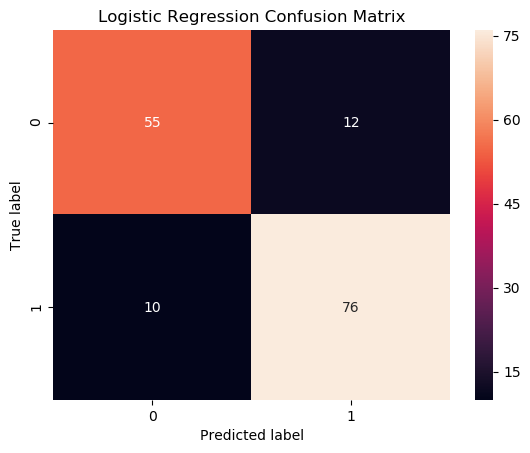

In [456]:
models = {'kNN' : myKNeighborsClassifier(n_neighbors=7, weights='distance'),
          'LDA' : myLinearDiscriminantAnalysis(),
          'QDA' : myQuadraticDiscriminantAnalysis(),
          'NB' : myNaiveBayes(),
          'Logistic Regression' : myLogisticRegression(threshold=0.5)
         }

for modelName, model in models.items():
    
    model.fit(x_train_scaled, y_train)
    
    y_pred = model.predict(x_test_scaled)
    
    print(modelName)
    print('-' * len(modelName))
    print(classification_report(y_test, y_pred))
    
    title = "%s Confusion Matrix" % modelName
    plot_confusion_matrix(y_test, y_pred, title)
    
